# Requirements

If you don't have the necessary packages installed, you can do so by executing the following line.  To do so, remove the comment.

In [1]:
# !pip install sympy_plot_backends[all]

In [1]:
import sympy
import spb

Documentation for using the backends can be found [online](https://sympy-plot-backends.readthedocs.io/en/latest/).

# Simple plot

By default, sympy plots don't look particularly pretty.  As an example, plot the function $\frac{1}{x}$

In [3]:
x = sympy.symbols('x')

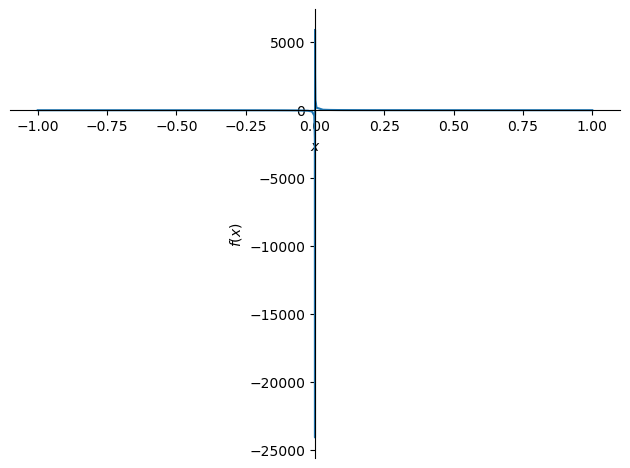

In [4]:
sympy.plot(1/x, (x, -1, 1));

However, using the `sympy_plot_backend` package, which is a drop-in replacement for sympy's `plot` function, you get much nicer looking plots.

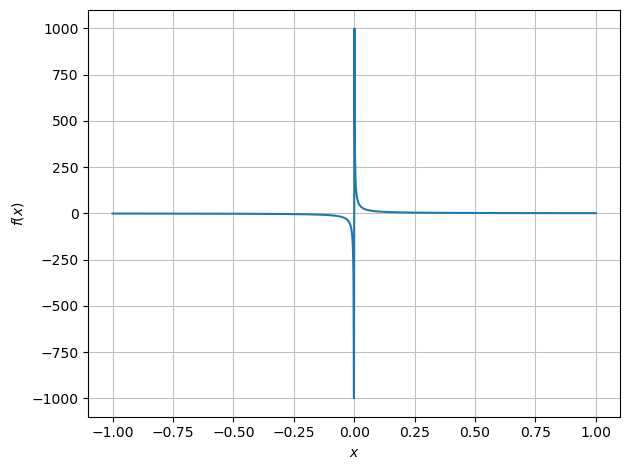

In [5]:
spb.plot(1/x, (x, -1, 1));

Results can be improved even further by have the `plot` function detect poles automatically, `eps` controls 

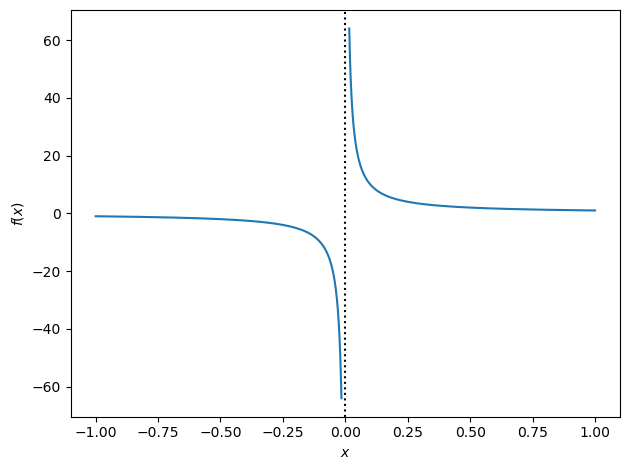

In [6]:
spb.plot(1/x, (x, -1, 1), detect_poles='symbolic', adaptive=True, eps=1e-4, grid=False)

It is also possible to change the $x$ and $y$ axis labels, and limit hte $y$ range of the plot.

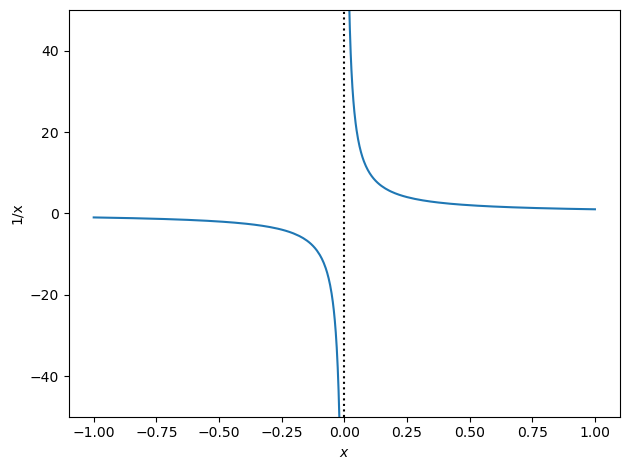

In [7]:
spb.plot(1/x, (x, -1, 1), detect_poles='symbolic', adaptive=True, eps=1e-4, grid=False,
         ylabel='1/x', ylim=(-50, 50));

# Alternative backend

The default  backend is matplotlib, however, this can be changed easily to Bokeh to create interactive plots.

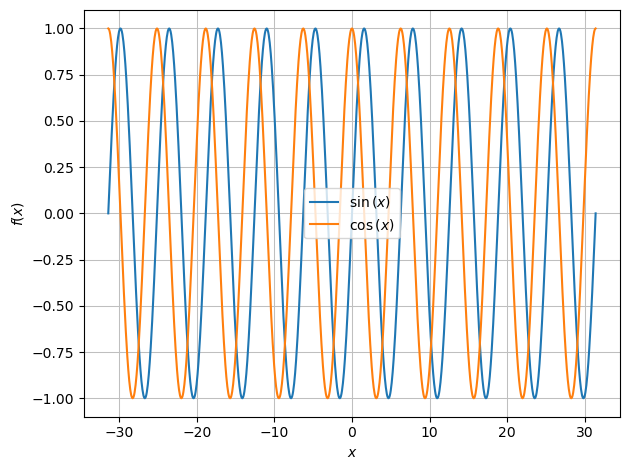

In [8]:
spb.plot(sympy.sin(x), sympy.cos(x), (x, -10*sympy.pi, 10*sympy.pi));

Simply changing the backend to `BB` creates a Bokeh plot.

In [9]:
spb.plot(sympy.sin(x), sympy.cos(x), (x, -10*sympy.pi, 10*sympy.pi),
         backend=spb.BB);

# Multiple plots

You can create multiple plots and combine them, which gives you more control over the visual representations.

In [10]:
mu, phi, x_max = 0.1, 4, 15*sympy.pi
p1 = spb.plot(sympy.exp(-mu*x), -sympy.exp(-mu*x), (x, 0, x_max), 
              {'line_dash': 'dotted', 'line_color': 'red', 'line_width': 0.75},
              show=False, backend=spb.BB)
p2 = spb.plot(sympy.cos(phi*x)*sympy.exp(-mu*x), (x, 0, x_max), show=False, backend=spb.BB)
(p1 + p2).show()

# Interactive plot

It is straightforward to create an interactive plot.  The plot is parameterized by two quantities, the damping $\mu$ and the frequency $\phi$.  The function to plot is:
$$
    f(t) = \cos(\phi t) e^{-\mu t}
$$
Additionally, the upper and lower limits of the function are also plotted, $e^{-\mu t}$ and $-e^{-\mu t}$ respectively.

In [11]:
t, mu, phi = sympy.symbols('t mu phi')
x_max = 15*sympy.pi
limit_style = {
    'line_dash': 'dotted',
    'line_color': 'blue',
    'line_width': 0.75,
}
spb.plot(
    (sympy.exp(-mu*t), 'upper limit', limit_style),
    (sympy.cos(phi*t)*sympy.exp(-mu*t), 'oscillator'),
    (-sympy.exp(-mu*t), 'lower limit', limit_style),
    spb.prange(t, 0, x_max),
    params={
        mu: (0.25, 0.0, 0.75),
        phi: (4, 0, 10),
    },
    backend=spb.BB
)

# Implicit plots

The Cassini curve is defined by the following equation:
$$
  (x^2 + y^2)^2 - 2c^2(x^2 - y^2) - (a^4 - c^4) = 0
$$

In [12]:
x, y, a, c = sympy.symbols('x y a c')

You can easily create an implicit plot.

In [13]:
cassini = (x**2 + y**2)**2 - 2*c**2*(x**2 - y**2) - (a**4 - c**4)

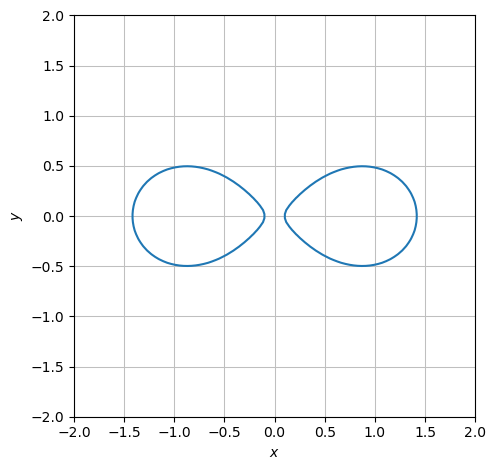

In [14]:
spb.plot_implicit(cassini.subs({a: 1, c: 1.005}), (x, -2, 2), (y, -2, 2), aspect='equal');

The interaction built-in to the sympy_plot_backends package doesn't seem to work properly with `plot_implicit`, but you can use the ipywidget `interact` decorator to achieve the same result.

In [5]:
from ipywidgets import interact

In [16]:
@interact(a_value=(0.0, 2.0, 0.05), c_value=(0.0, 2.0, 0.05))
def plot_cassini(a_value, c_value):
    p = spb.plot_implicit(cassini.subs({a: a_value, c: c_value}),
                          (x, -3, 3), (y, -2, 2), aspect='equal',
                          show=False)
    p.show()

interactive(children=(FloatSlider(value=1.0, description='a_value', max=2.0, step=0.05), FloatSlider(value=1.0…

# Parametric plots

Parametric plots are also easy to create, for instance, the $x$ and $y$ values for the hypercycloid are defined as:
$$
    \begin{array}{rcl}
        x(t) & = & (A - B) \cos t - B \cos \frac{A - B}{B} t \\
        y(t) & = & (A - B) \sin t + B \sin \frac{A - B}{B} t
    \end{array}
$$
Here, $A$ is the radius of the outer circle, while $B$ is the radius of the circle that rolls inside the outer circle.  The curve is traced by a point on the rolling circle.

In [14]:
@interact(B=(0.1, 10, 0.1), t_max=(0, 1_000, 1))
def plot_hypercycloid(B=3, t_max=10):
    A = 10
    t = sympy.symbols('t')
    x_expr = (A - B)*sympy.cos(t) + B*sympy.cos((A - B)*t/B)
    y_expr = (A - B)*sympy.sin(t) - B*sympy.sin((A - B)*t/B)
    p = spb.plot_parametric((x_expr, y_expr), (t, 0, t_max),
                            aspect='equal', xlim=(-11, 11), ylim=(-10, 10),
                            show=False)
    p.show()

interactive(children=(FloatSlider(value=3.0, description='B', max=10.0, min=0.1), IntSlider(value=10, descript…